In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
class ModifiedAlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ModifiedAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [10]:
class ModifiedVGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(ModifiedVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [11]:
# 가중치 초기화 함수 정의
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)

In [12]:
# 모델 초기화
alexnet = ModifiedAlexNet()
alexnet.apply(weights_init)

vggnet = ModifiedVGG16()
vggnet.apply(weights_init)

ModifiedVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [13]:
def train(model, trainloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(trainloader)

def evaluate(model, testloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return loss / len(testloader), accuracy

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
alexnet = alexnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.01, momentum=0.9)

alexnet_history = {"train_loss": [], "test_loss": [], "test_acc": []}
num_epochs = 50

for epoch in range(num_epochs):
    train_loss = train(alexnet, trainloader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(alexnet, testloader, criterion, device)
    alexnet_history["train_loss"].append(train_loss)
    alexnet_history["test_loss"].append(test_loss)
    alexnet_history["test_acc"].append(test_acc)
    print(f"AlexNet - Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

AlexNet - Epoch 1/50, Train Loss: 2.1202, Test Loss: 1.7765, Test Acc: 32.96%
AlexNet - Epoch 2/50, Train Loss: 1.5618, Test Loss: 1.3600, Test Acc: 49.78%
AlexNet - Epoch 3/50, Train Loss: 1.3177, Test Loss: 1.1619, Test Acc: 57.40%
AlexNet - Epoch 4/50, Train Loss: 1.1479, Test Loss: 1.0712, Test Acc: 61.17%
AlexNet - Epoch 5/50, Train Loss: 1.0046, Test Loss: 0.9871, Test Acc: 65.16%
AlexNet - Epoch 6/50, Train Loss: 0.8909, Test Loss: 0.8997, Test Acc: 67.97%
AlexNet - Epoch 7/50, Train Loss: 0.7875, Test Loss: 0.8728, Test Acc: 69.70%
AlexNet - Epoch 8/50, Train Loss: 0.7089, Test Loss: 0.8805, Test Acc: 70.19%
AlexNet - Epoch 9/50, Train Loss: 0.6332, Test Loss: 0.8176, Test Acc: 72.98%
AlexNet - Epoch 10/50, Train Loss: 0.5589, Test Loss: 0.8313, Test Acc: 73.01%
AlexNet - Epoch 11/50, Train Loss: 0.4909, Test Loss: 0.7798, Test Acc: 74.54%
AlexNet - Epoch 12/50, Train Loss: 0.4217, Test Loss: 0.8591, Test Acc: 73.53%
AlexNet - Epoch 13/50, Train Loss: 0.3631, Test Loss: 0.8523,

In [16]:
vggnet = vggnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vggnet.parameters(), lr=0.01, momentum=0.9)

vggnet_history = {"train_loss": [], "test_loss": [], "test_acc": []}
num_epochs = 50

for epoch in range(num_epochs):
    train_loss = train(vggnet, trainloader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(vggnet, testloader, criterion, device)
    vggnet_history["train_loss"].append(train_loss)
    vggnet_history["test_loss"].append(test_loss)
    vggnet_history["test_acc"].append(test_acc)
    print(f"VGGNet - Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

VGGNet - Epoch 1/50, Train Loss: 2.2557, Test Loss: 2.0849, Test Acc: 19.50%
VGGNet - Epoch 2/50, Train Loss: 1.9629, Test Loss: 1.8753, Test Acc: 25.96%
VGGNet - Epoch 3/50, Train Loss: 1.6908, Test Loss: 1.4911, Test Acc: 42.89%
VGGNet - Epoch 4/50, Train Loss: 1.3836, Test Loss: 1.3161, Test Acc: 53.04%
VGGNet - Epoch 5/50, Train Loss: 1.1170, Test Loss: 1.0449, Test Acc: 63.30%
VGGNet - Epoch 6/50, Train Loss: 0.9284, Test Loss: 0.9073, Test Acc: 67.97%
VGGNet - Epoch 7/50, Train Loss: 0.7821, Test Loss: 0.8710, Test Acc: 69.68%
VGGNet - Epoch 8/50, Train Loss: 0.6641, Test Loss: 0.7517, Test Acc: 74.66%
VGGNet - Epoch 9/50, Train Loss: 0.5497, Test Loss: 0.7597, Test Acc: 75.23%
VGGNet - Epoch 10/50, Train Loss: 0.4949, Test Loss: 0.6972, Test Acc: 76.85%
VGGNet - Epoch 11/50, Train Loss: 0.3977, Test Loss: 0.7011, Test Acc: 78.50%
VGGNet - Epoch 12/50, Train Loss: 0.3263, Test Loss: 0.7453, Test Acc: 78.43%
VGGNet - Epoch 13/50, Train Loss: 0.2766, Test Loss: 0.7177, Test Acc: 78

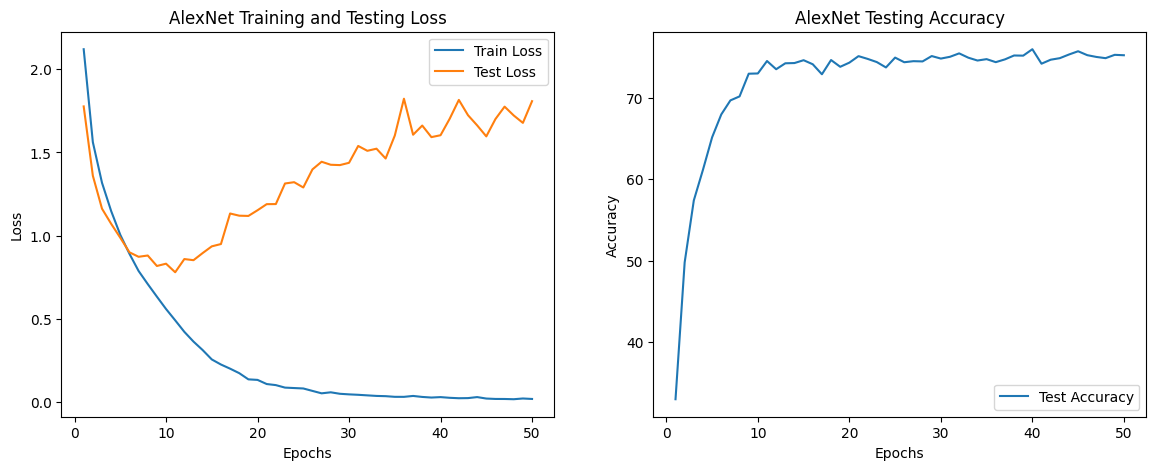

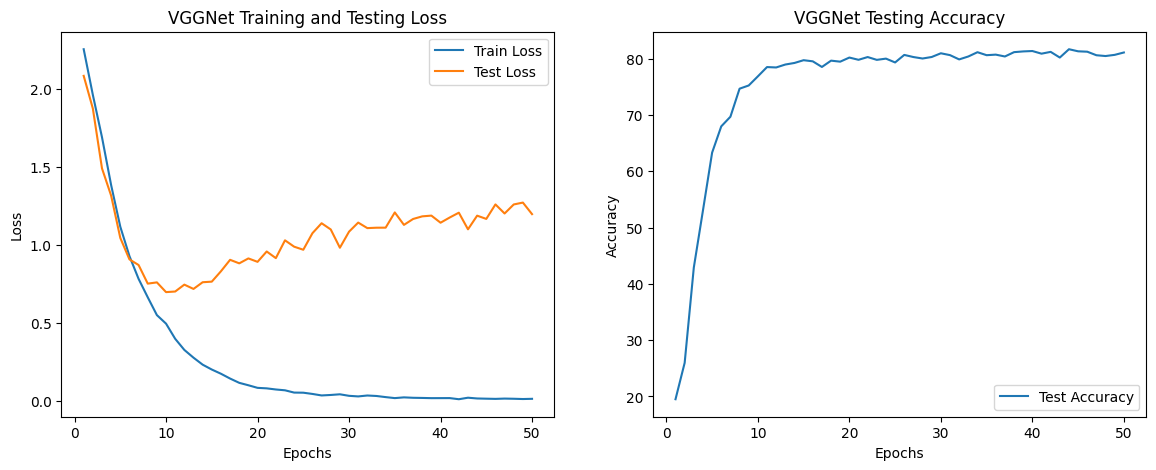

In [17]:
def plot_history(history, title):
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label='Train Loss')
    plt.plot(epochs, history["test_loss"], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} Training and Testing Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["test_acc"], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} Testing Accuracy')
    plt.legend()

    plt.show()

# 결과 시각화
plot_history(alexnet_history, 'AlexNet')
plot_history(vggnet_history, 'VGGNet')

## AlexNet과 VGGNet을 이용한 CIFAR-10 이미지 분류 성능 비교 소논문

### 1. 서론
딥러닝의 발전은 이미지 분류 분야에서 많은 진전을 가져왔습니다. 특히, AlexNet과 VGGNet은 각각 2012년과 2014년에 발표되어 딥러닝의 역사에서 중요한 역할을 했습니다. 본 논문에서는 CIFAR-10 데이터셋을 이용하여 AlexNet과 VGGNet의 성능을 비교하고, 두 모델의 구조적 차이가 성능에 미치는 영향을 분석합니다.

### 2. 관련 연구
**AlexNet**은 2012년 ILSVRC 대회에서 우승하며 주목받은 모델로, 큰 커널 크기와 ReLU 활성화 함수, 드롭아웃을 이용한 정규화 기법 등이 특징입니다 (Krizhevsky et al., 2012). **VGGNet**은 2014년 ILSVRC 대회에서 높은 성능을 기록한 모델로, 작은 3x3 필터를 깊게 쌓은 구조를 통해 이미지 특징을 효과적으로 추출합니다 (Simonyan & Zisserman, 2014).

### 3. 방법론
#### 3.1. 데이터셋
CIFAR-10 데이터셋은 10개의 클래스와 각각 6,000개의 이미지로 구성된 데이터셋입니다. 이미지의 크기는 32x32이며, 학습용 데이터는 50,000개, 테스트용 데이터는 10,000개로 구성되어 있습니다.

#### 3.2. 모델 구조
**AlexNet**은 다음과 같은 구조를 갖습니다:
- 5개의 컨볼루션 레이어
- 3개의 풀링 레이어
- 3개의 완전 연결 레이어
- ReLU 활성화 함수와 드롭아웃을 사용

**VGGNet**은 다음과 같은 구조를 갖습니다:
- 13개의 컨볼루션 레이어
- 5개의 풀링 레이어
- 3개의 완전 연결 레이어
- ReLU 활성화 함수와 드롭아웃을 사용

#### 3.3. 가중치 초기화
모델의 가중치는 He 초기화 방법을 사용하여 초기화하였습니다. 이 방법은 ReLU 활성화 함수와 잘 맞아 모델의 학습을 빠르고 안정적으로 할 수 있게 합니다.

#### 3.4. 학습 파라미터
두 모델 모두 학습률은 0.01, 모멘텀은 0.9로 설정하였으며, 교차 엔트로피 손실 함수를 사용하였습니다. 최적화 기법으로는 SGD를 사용하였습니다.

### 4. 실험 결과 및 분석
#### 4.1. 학습 및 평가 결과
각 모델을 50 에포크 동안 학습시켰으며, 각 에포크마다 학습 손실, 테스트 손실, 테스트 정확도를 기록하였습니다.

**AlexNet 성능**:
- 최종 테스트 정확도: 75.25%
- 최종 테스트 손실: 1.8080
- 최고 테스트 정확도: 75.99%
- 최고 테스트 손실: 1.6033

**VGGNet 성능**:
- 최종 테스트 정확도: 81.09%
- 최종 테스트 손실: 1.1976
- 최고 테스트 정확도: 81.35%
- 최고 테스트 손실: 1.1425

#### 4.2. 분석
VGGNet이 AlexNet보다 높은 정확도와 낮은 손실 값을 보였습니다. 이는 VGGNet의 깊은 네트워크 구조가 더 많은 특징을 효과적으로 추출할 수 있기 때문입니다. 작은 3x3 필터를 사용하여 깊은 구조를 가지는 VGGNet은 더 세밀한 이미지 특징을 학습할 수 있습니다.

다음은 AlexNet과 VGGNet의 학습 및 테스트 과정에서 기록된 손실과 정확도를 시각화한 그래프입니다.

**AlexNet과 VGGNet의 학습 및 테스트 손실과 정확도**

(plot)

- **AlexNet의 학습 및 테스트 손실**: 학습 손실은 점점 감소하지만, 테스트 손실은 특정 에포크 이후 증가하는 경향을 보입니다. 이는 과적합(overfitting)이 발생했음을 시사합니다.
- **AlexNet의 테스트 정확도**: 테스트 정확도는 약 75%로 일정한 수준을 유지합니다.

- **VGGNet의 학습 및 테스트 손실**: 학습 손실은 지속적으로 감소하며, 테스트 손실도 비교적 낮은 수준에서 유지됩니다.
- **VGGNet의 테스트 정확도**: 테스트 정확도는 약 81%로 더 높은 수준에서 안정적입니다.

### 5. 결론 및 향후 연구 방향
본 논문에서는 AlexNet과 VGGNet을 CIFAR-10 데이터셋을 이용하여 비교 분석하였습니다. 실험 결과 VGGNet이 더 높은 성능을 보였으며, 이는 깊은 네트워크 구조의 이점을 보여줍니다. 향후 연구에서는 더 다양한 데이터셋과 모델을 이용하여 비교 분석을 확대할 계획입니다. 또한, 과적합 문제를 해결하기 위한 정규화 기법 및 데이터 증강 기법을 추가적으로 연구할 필요가 있습니다.

### 참고문헌
- Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet classification with deep convolutional neural networks. Advances in neural information processing systems, 25.
- Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.